In [90]:
import os
import sys
import numpy as np
import pandas as pd
import pickle
import random
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import hinge_loss
from AEspeech import AEspeech
import pdb
from sklearn import metrics
from sklearn import svm, datasets
from sklearn.svm import SVC
from scipy import stats
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import joblib

In [91]:
"""
Specify rep choice: <'narrowband', 'broadband', 'wvlt', 'early_fuse2/3', 'late_fuse2/3', 'mc_fuse'>
mc_fuse: multi-channel fusion
fuse2/3: 2 utilized only narrowband/broadband, 3 included wvlt
"""

PATH=os.getcwd()

rep='narrowband'
# spk_typ='hc'
# hc_res_path=PATH+'/clpSpanish/speech/papa/diff_recon/'+spk_typ+'_'+rep+'_synthesisData.pkl'
# hc_narrowband_results=pd.read_pickle(hc_res_path)

spk_typ='clp'
clp_res_path=PATH+'/clpSpanish/speech/papa/diff_recon/'+spk_typ+'_'+rep+'_synthesisData.pkl'
clp_narrowband_results=pd.read_pickle(clp_res_path)

clp_narrowband_pre_results=clp_narrowband_results.iloc[::2]
clp_narrowband_post_results=clp_narrowband_results.iloc[1::2]
# hc_narrowband_pre_results=hc_narrowband_results.iloc[::2]
# hc_narrowband_post_results=hc_narrowband_results.iloc[1::2]

rep='broadband'
# spk_typ='hc'
# hc_res_path=PATH+'/clpSpanish/speech/papa/diff_recon/'+spk_typ+'_'+rep+'_synthesisData.pkl'
# hc_broadband_results=pd.read_pickle(hc_res_path)

spk_typ='clp'
clp_res_path=PATH+'/clpSpanish/speech/papa/diff_recon/'+spk_typ+'_'+rep+'_synthesisData.pkl'
clp_broadband_results=pd.read_pickle(clp_res_path)

clp_broadband_pre_results=clp_broadband_results.iloc[::2]
clp_broadband_post_results=clp_broadband_results.iloc[1::2]
# hc_broadband_pre_results=hc_broadband_results.iloc[::2]
# hc_broadband_post_results=hc_broadband_results.iloc[1::2]

In [93]:
clp_narrowband_post_results

,audio_names,STOI,consonantal,back,anterior,open,close,stop,nasal,continuant,lateral,flap,trill,voice,strident,labial,dental,velar,pause,vocalic
1,CLP001_papa,0.313186,"[0.32918325, 0.0021663045]","[0.63456553, 0.00046521242]","[0.0097278105, 0.00024339835]","[0.62508076, 0.0007506168]","[0.0028199654, 0.00011543903]","[0.37483826, 0.00066239294]","[0.11534198, 1.1202071e-05]","[0.1391237, 0.014460139]","[0.037291475, 1.3289421e-05]","[0.4105033, 0.00010137434]","[5.1646016e-06, 1.2785941e-07]","[0.7190691, 0.0001873545]","[0.0003956946, 0.008202302]","[0.35490638, 0.0020660865]","[0.3684136, 3.5120538e-05]","[0.27345067, 0.00034206323]","[0.13788703, 0.99929374]","[0.64414734, 0.00045507902]"
3,CLP002_papa,0.320194,"[0.45665765, 0.0012914536]","[0.58872724, 0.00046072702]","[0.20310345, 0.00066821306]","[0.5587164, 0.0013444752]","[0.05471734, 7.9277444e-05]","[0.411343, 0.00052819785]","[0.48620152, 1.29831315e-05]","[0.34072417, 0.015475121]","[0.020317515, 2.8114671e-05]","[0.22631605, 0.00015743788]","[0.00018816926, 1.4211071e-06]","[0.67037004, 0.00044554975]","[0.21851833, 0.007992862]","[0.25942153, 0.0011658137]","[0.2598743, 4.9991966e-05]","[0.012639001, 0.00081270834]","[0.1714411, 0.9992878]","[0.5144364, 0.0012191195]"
5,CLP004_papa,0.211311,"[0.11201336, 0.001570795]","[0.49256992, 0.0005949306]","[0.0034063451, 0.0012586887]","[0.43879563, 0.0013102272]","[0.0014370481, 8.94516e-05]","[0.09030967, 0.00037104118]","[0.038070843, 1.0676581e-05]","[0.11400106, 0.01670705]","[0.030930763, 0.00019700782]","[0.21710077, 1.374945e-05]","[6.245451e-08, 4.089213e-07]","[0.41658157, 0.00052805955]","[0.10190837, 0.0061621876]","[0.10536392, 0.0030631674]","[0.0028608753, 4.278716e-05]","[0.008546309, 0.00033286752]","[0.49518728, 0.9994033]","[0.44796675, 0.001240195]"
7,CLP006_papa,0.487795,"[0.15797547, 0.002528388]","[0.49832612, 0.0018040887]","[0.004167909, 0.0012293311]","[0.48699316, 0.0009693848]","[0.006155193, 0.00010142564]","[0.14136815, 0.00027612675]","[0.12423904, 7.3872125e-06]","[0.04943948, 0.02367848]","[0.04967627, 0.00019608528]","[0.022078197, 0.0005013009]","[8.248677e-08, 5.1892416e-06]","[0.48160353, 0.00053557596]","[0.05314703, 0.0057065]","[0.0010000619, 0.018841676]","[0.046451442, 0.0010990764]","[0.20098121, 3.8661892e-05]","[0.45162788, 0.99945986]","[0.4602813, 0.0011616574]"
9,CLP007_papa,0.555047,"[0.3455393, 0.0011629685]","[0.41122317, 0.0007799052]","[0.060512375, 0.00047765614]","[0.4005274, 0.0012559628]","[0.19089946, 7.587051e-05]","[0.30804282, 0.00049338565]","[0.1788214, 1.069651e-05]","[0.105437115, 0.0143597545]","[0.0016288953, 6.0001224e-05]","[0.07880212, 0.00016812349]","[0.008789269, 4.6239023e-07]","[0.50281197, 0.0004642585]","[0.08133201, 0.0027762298]","[0.23651466, 0.001389109]","[0.18966843, 2.213968e-05]","[0.12911119, 0.0011481068]","[0.3012088, 0.9994729]","[0.4731505, 0.0010711439]"
11,CLP008_papa,0.378890,"[0.25990167, 0.0015691726]","[0.74023616, 0.00059773383]","[0.0020086018, 0.00032882066]","[0.7627715, 0.0014825547]","[0.19199108, 3.819216e-05]","[0.3346727, 0.0011231579]","[0.021246066, 2.0554005e-05]","[0.045921497, 0.012405921]","[0.0075986506, 0.00014117225]","[0.2230676, 0.0007050961]","[0.0040050563, 1.5068252e-07]","[0.74807656, 0.00037383582]","[0.0011413094, 0.00895663]","[0.46964437, 0.0004995979]","[0.061852623, 2.0927144e-05]","[0.13636948, 0.0022645742]","[0.01709436, 0.99912107]","[0.70392, 0.0013453321]"
13,CLP009_papa,0.395282,"[0.31630692, 0.00198976]","[0.640446, 0.00081641815]","[0.004090339, 0.0008144391]","[0.7452335, 0.0012555458]","[0.0071575777, 0.0001364736]","[0.2865743, 0.0004079522]","[0.04904324, 6.3551015e-06]","[0.22370437, 0.017255086]","[0.0037946247, 0.00023958061]","[0.23788464, 3.6601763e-05]","[0.0033905418, 1.4689898e-06]","[0.72093356, 0.00056091713]","[0.0016174463, 0.009176877]","[0.3127759, 0.005116239]","[0.13706754, 8.759706e-05]","[0.01180725, 0.00020787792]","[0.054177362, 0.99939966]","[0.76115096, 0.000942

In [86]:
phon_ori_tbl=pd.DataFrame(index=clp_broadband_post_results.columns[2:], columns=['mean','tstat','pval'])
phon_pre_tbl=pd.DataFrame(index=clp_broadband_post_results.columns[2:], columns=['bb_mean','nb_mean','tstat','pval'])
phon_post_tbl=pd.DataFrame(index=clp_broadband_post_results.columns[2:], columns=['bb_mean','nb_mean','tstat','pval'])

phon_ori_tbl['mean']=clp_broadband_pre_results.mean().str[0]
phon_pre_tbl['bb_mean']=clp_broadband_pre_results.mean().str[1]
phon_pre_tbl['nb_mean']=clp_narrowband_pre_results.mean().str[1]
phon_post_tbl['bb_mean']=clp_broadband_post_results.mean().str[1]
phon_post_tbl['nb_mean']=clp_narrowband_post_results.mean().str[1]

for ind in phon_ori_tbl.index:
    phon_ori_tbl['tstat'][ind]=stats.ttest_ind(clp_broadband_pre_results[ind].str[0],clp_narrowband_pre_results[ind].str[0]).statistic
    phon_ori_tbl['pval'][ind]=stats.ttest_ind(clp_broadband_pre_results[ind].str[0],clp_narrowband_pre_results[ind].str[0]).pvalue
    phon_pre_tbl['tstat'][ind]=stats.ttest_ind(clp_broadband_pre_results[ind].str[1],clp_narrowband_pre_results[ind].str[1]).statistic
    phon_pre_tbl['pval'][ind]=stats.ttest_ind(clp_broadband_pre_results[ind].str[1],clp_narrowband_pre_results[ind].str[1]).pvalue
    phon_post_tbl['tstat'][ind]=stats.ttest_ind(clp_broadband_post_results[ind].str[1],clp_narrowband_post_results[ind].str[1],).statistic
    phon_post_tbl['pval'][ind]=stats.ttest_ind(clp_broadband_post_results[ind].str[1],clp_narrowband_post_results[ind].str[1]).pvalue


C:\Users\Gabriel\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\Gabriel\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\Gabriel\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gabriel\Anaconda3\lib\site-packages\ipyk

In [82]:
phon_pre_tbl.sort_values('tstat',ascending=False)

,bb_mean,nb_mean,tstat,pval
dental,0.115223,0.069750,2.03119,0.0460896
continuant,0.229024,0.177686,1.58432,0.117693
stop,0.308881,0.275318,1.2949,0.199672
strident,0.089202,0.055939,1.16651,0.247424
flap,0.146102,0.122955,0.857129,0.394341
consonantal,0.409679,0.382489,0.734198,0.465316
velar,0.070343,0.058850,0.654084,0.515232
back,0.567574,0.548383,0.49061,0.625259
lateral,0.065782,0.056665,0.415618,0.678979
vocalic,0.528989,0.518617,0.281383,0.779259


One sided T-test to determine if difference results are significant.
Null Hypothesis: difference between representations
 is not significant.
 Bb Mean: 0.3153705383679958 Nb Mean: 0.7304701651279781
 T-test stat: 13.246 p-value: 1e-22


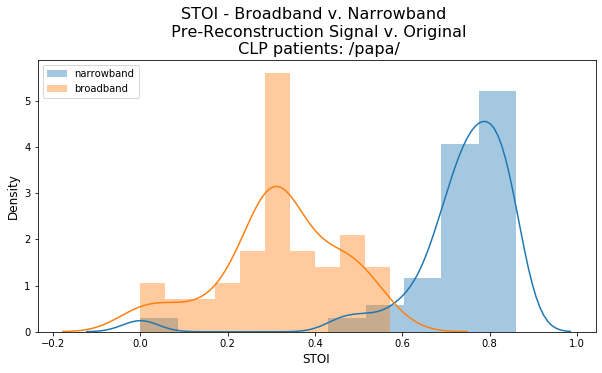

In [94]:
"""
Comparing reconstructed, pre-synthesized, broadband signals and pre-synthesized, narrowband signals
"""
measure='STOI'

nbmeans=[]
bbmeans=[]
if measure != 'STOI':
    for itr in range(50):
        nbmeans.append(list(clp_narrowband_pre_results[measure])[itr][1])
        bbmeans.append(list(clp_broadband_pre_results[measure])[itr][1])
else:
    nbmeans=list(clp_narrowband_pre_results[measure])
    bbmeans=list(clp_broadband_pre_results[measure])
plt.figure(figsize= (10,5))
plt.title(measure+' - Broadband v. Narrowband \n Pre-Reconstruction Signal v. Original\n CLP patients: /papa/', fontsize=16)

ax = sns.distplot(np.abs(nbmeans), bins = 10, label = 'narrowband', norm_hist = False)
if measure!='STOI':
    plt.xlabel("Abs. Difference in "+str(measure), fontsize=12)
else:
    plt.xlabel("STOI", fontsize=12)
    
plt.ylabel("Density", fontsize=12)
sns.distplot(np.abs(bbmeans),  bins = 10, label = 'broadband', norm_hist = False)
plt.legend()

print('One sided T-test to determine if difference results'+
      ' are significant.\nNull Hypothesis: difference between representations'+
      '\n is not significant.\n Bb Mean: '+str(np.mean(bbmeans))+' Nb Mean: '+str(np.mean(nbmeans))+'\n T-test stat: '+
      str(np.round(np.abs(stats.ttest_ind(nbmeans,bbmeans).statistic),3))+
      ' p-value: '+str(np.round(np.abs(stats.ttest_ind(nbmeans,bbmeans).pvalue),22)))

One sided T-test to determine if difference results are significant.
Null Hypothesis: difference between representations
 is not significant.
 Bb Mean: 0.29359717857232814 Nb Mean: 0.4141070126782199
 T-test stat: 4.064 p-value: 0.000105347975


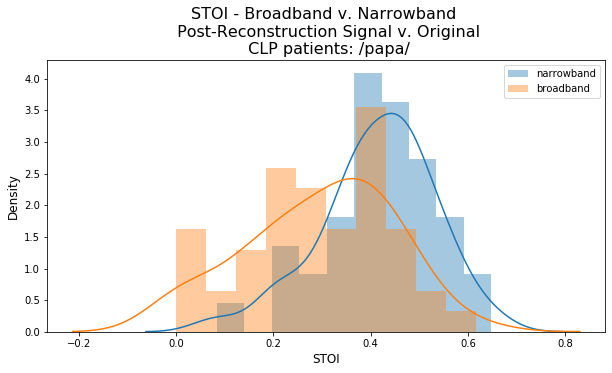

In [95]:
"""
Comparing reconstructed, post-synthesized, broadband signals and post-synthesized, narrowband signals
"""

measure='STOI'

nbmeans=[]
bbmeans=[]
if measure != 'STOI':
    for itr in range(50):
        nbmeans.append(list(clp_narrowband_post_results[measure])[itr][1])
        bbmeans.append(list(clp_broadband_post_results[measure])[itr][1])
else:
    nbmeans=list(clp_narrowband_post_results[measure])
    bbmeans=list(clp_broadband_post_results[measure])
plt.figure(figsize= (10,5))
plt.title(measure+' - Broadband v. Narrowband \n Post-Reconstruction Signal v. Original\n CLP patients: /papa/', fontsize=16)

ax = sns.distplot(np.abs(nbmeans), bins = 10, label = 'narrowband', norm_hist = False)
if measure!='STOI':
    plt.xlabel("Abs. Difference in "+str(measure), fontsize=12)
else:
    plt.xlabel("STOI", fontsize=12)
plt.ylabel("Density", fontsize=12)
sns.distplot(np.abs(bbmeans),  bins = 10, label = 'broadband', norm_hist = False)
plt.legend()

print('One sided T-test to determine if difference results'+
      ' are significant.\nNull Hypothesis: difference between representations'+
      '\n is not significant.\n Bb Mean: '+str(np.mean(bbmeans))+' Nb Mean: '+str(np.mean(nbmeans))+'\n T-test stat: '+
      str(np.round(np.abs(stats.ttest_ind(nbmeans,bbmeans).statistic),3))+
      ' p-value: '+str(np.round(np.abs(stats.ttest_ind(nbmeans,bbmeans).pvalue),12)))

In [9]:
# """KL divergence to compare difference in original synthesized signal and reconstructed"""
# from math import log2
# def kl_divergence(p, q):
#     return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

# print("\n KL Divergence between Distributions: "+ str(kl_divergence(nbmeans/np.sum(nbmeans),bbmeans/np.sum(bbmeans))))

One sided T-test to determine if difference results are significant.
Null Hypothesis: difference between representations
 is not significant.
 Bb Mean: 0.31847200290076766 Nb Mean: 0.41541040208869273
 T-test stat: 2.635 p-value: 0.010369822642


STOI                               0.152927
consonantal       [0.16250107, 0.043444704]
back               [0.17704302, 0.05892359]
anterior       [-0.007924234, 0.0032848208]
open               [0.18111163, 0.05581847]
close           [0.011078415, 0.0040057674]
stop                [0.16225353, 0.0475676]
nasal              [0.09032182, 0.05008903]
stop                [0.16225353, 0.0475676]
continuant     [-0.08429366, -0.0032020237]
lateral            [0.0410401, 0.019301951]
flap              [0.023440469, 0.01924273]
trill            [0.012109485, 0.008064102]
voice              [0.21230969, 0.06696112]
strident       [-0.033874784, -0.014129979]
labial            [0.10614358, 0.056088854]
dental             [0.05663193, 0.04106847]
velar            [0.093857124, 0.056689166]
pause            [-0.40266895, 0.015949879]
vocalic           [0.16786624, 0.053528428]
dtype: object


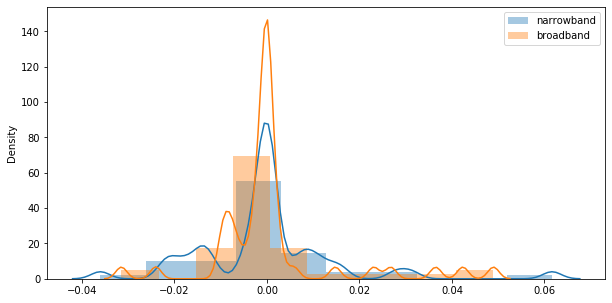

In [155]:
"""
Comparing original synthesized broadband and original synthesized narrowband signals
"""

print(pd_narrowband_results.mean())
measure='trill'

nbmeans=[]
bbmeans=[]
if measure != 'STOI':
    for itr in range(50):
        nbmeans.append(list(pd_narrowband_ori_results[measure])[itr][0])
        bbmeans.append(list(pd_broadband_ori_results[measure])[itr][0])
else:
    nbmeans=list(pd_narrowband_ori_results[measure])
    bbmeans=list(pd_broadband_ori_results[measure])
plt.figure(figsize= (10,5))
# plt.title(lang_obj.lang.capitalize()+' Speakers \n'+title_xtra)
ax = sns.distplot(np.abs(nbmeans), bins = 10, label = 'narrowband', norm_hist = False)
plt.xlabel("Abs. Difference from Original Time Domain Signal's Phoneme Posteriors")
plt.ylabel("Density")
sns.distplot(np.abs(bbmeans),  bins = 10, label = 'broadband', norm_hist = False)
plt.legend()

STOI                               0.151468
consonantal       [0.16938351, 0.044163037]
back                [0.1819275, 0.05982535]
anterior       [-0.0075236345, 0.003340818]
open               [0.18917164, 0.05550157]
close           [0.009438446, 0.0026293278]
stop               [0.17221802, 0.04933781]
nasal             [0.08649105, 0.046930656]
stop               [0.17221802, 0.04933781]
continuant     [-0.081785515, -0.005225312]
lateral          [0.037035767, 0.017535165]
flap               [0.03015572, 0.02109294]
trill           [0.010626424, 0.0070000943]
voice              [0.21563086, 0.06665278]
strident       [-0.035595343, -0.015912186]
labial            [0.10102037, 0.055958107]
dental            [0.06275486, 0.044064097]
velar             [0.09702385, 0.057808112]
pause             [-0.40920982, 0.01613245]
vocalic            [0.1750347, 0.054605402]
dtype: object


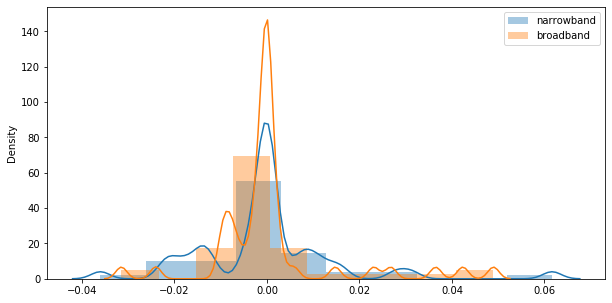

In [160]:
"""
Comparing original synthesized broadband and original synthesized narrowband signals
"""

print(pd_narrowband_results.mean())
measure='trill'

nbmeans=[]
bbmeans=[]
if measure != 'STOI':
    for itr in range(50):
        nbmeans.append(list(hc_narrowband_ori_results[measure])[itr][0])
        bbmeans.append(list(hc_broadband_ori_results[measure])[itr][0])
else:
    nbmeans=list(hc_narrowband_ori_results[measure])
    bbmeans=list(hc_broadband_ori_results[measure])
plt.figure(figsize= (10,5))
# plt.title(lang_obj.lang.capitalize()+' Speakers \n'+title_xtra)
ax = sns.distplot(np.abs(nbmeans), bins = 10, label = 'narrowband', norm_hist = False)
plt.xlabel("Abs. Difference from Original Time Domain Signal's Phoneme Posteriors")
plt.ylabel("Density")
sns.distplot(np.abs(bbmeans),  bins = 10, label = 'broadband', norm_hist = False)
plt.legend()

STOI                               0.152927
consonantal       [0.16250107, 0.043444704]
back               [0.17704302, 0.05892359]
anterior       [-0.007924234, 0.0032848208]
open               [0.18111163, 0.05581847]
close           [0.011078415, 0.0040057674]
stop                [0.16225353, 0.0475676]
nasal              [0.09032182, 0.05008903]
stop                [0.16225353, 0.0475676]
continuant     [-0.08429366, -0.0032020237]
lateral            [0.0410401, 0.019301951]
flap              [0.023440469, 0.01924273]
trill            [0.012109485, 0.008064102]
voice              [0.21230969, 0.06696112]
strident       [-0.033874784, -0.014129979]
labial            [0.10614358, 0.056088854]
dental             [0.05663193, 0.04106847]
velar            [0.093857124, 0.056689166]
pause            [-0.40266895, 0.015949879]
vocalic           [0.16786624, 0.053528428]
dtype: object


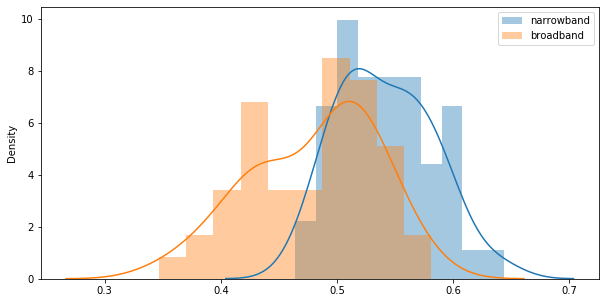

In [157]:
"""
Comparing reconstructed, synthesized, broadband signals and reconstructed, synthesized, narrowband signals
"""

print(pd_narrowband_results.mean())
measure='open'

nbmeans=[]
bbmeans=[]
if measure != 'STOI':
    for itr in range(50):
        nbmeans.append(list(hc_narrowband_recon_results[measure])[itr][0])
        bbmeans.append(list(hc_broadband_recon_results[measure])[itr][0])
else:
    nbmeans=list(hc_narrowband_recon_results[measure])
    bbmeans=list(hc_broadband_recon_results[measure])
plt.figure(figsize= (10,5))
# plt.title(lang_obj.lang.capitalize()+' Speakers \n'+title_xtra)
ax = sns.distplot(np.abs(nbmeans), bins = 10, label = 'narrowband', norm_hist = False)
plt.xlabel("Abs. Difference from Original Time Domain Signal's Phoneme Posteriors")
plt.ylabel("Density")
sns.distplot(np.abs(bbmeans),  bins = 10, label = 'broadband', norm_hist = False)
plt.legend()

STOI                               0.199329
consonantal        [0.25409284, 0.06854443]
back                [0.2813129, 0.06928411]
anterior         [0.046776224, 0.017031733]
open               [0.28678054, 0.06775647]
close           [0.0145267965, 0.003675134]
stop               [0.23965727, 0.07535945]
nasal            [0.091166064, 0.048995208]
stop               [0.23965727, 0.07535945]
continuant        [0.083512746, 0.02552627]
lateral           [0.053340387, 0.02423018]
flap              [0.08494142, 0.034812722]
trill            [0.014371769, 0.009004335]
voice              [0.3090072, 0.061673023]
strident         [0.024436373, 0.013131616]
labial           [0.088233665, 0.058549076]
dental            [0.12559877, 0.063705795]
velar              [0.115079544, 0.0682295]
pause          [-0.49507153, -0.0016407802]
vocalic             [0.2747573, 0.07044558]
dtype: object


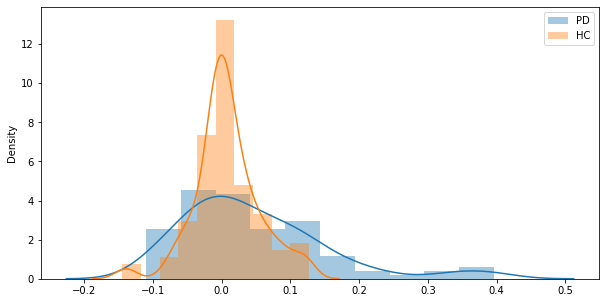

In [121]:
#Comparing PD/HC

print(pd_narrowband_results.mean())
measure='anterior'

pd_means=[]
hc_means=[]
if measure != 'STOI':
    for itr in range(100):
        pd_means.append(list(pd_narrowband_results[measure])[itr][0])
        hc_means.append(list(hc_narrowband_results[measure])[itr][0])
else:
    pd_means=list(pd_narrowband_results[measure])
    hc_means=list(hc_narrowband_results[measure])
plt.figure(figsize= (10,5))
# plt.title(lang_obj.lang.capitalize()+' Speakers \n'+title_xtra)
ax = sns.distplot(pd_means, bins = 10, label = 'PD', norm_hist = False)
# plt.xlabel(xlab)
plt.ylabel("Density")
sns.distplot(hc_means,  bins = 10, label = 'HC', norm_hist = False)
plt.legend()